In [1]:
import sys

sys.path.insert(0, "../src/")

from utils import *
from pu_learning import *
from autoencoder import *
from dgnr import *
from random_graphs import *

In [2]:
N_rand_drugs = 80
N_rand_targets = 100

density=0.2
density_dp = 0.5
#generate random matrices in M({0,1})
#1. a drug-drug network (drug similarities)
#2. a protein-protein network (protein similarities)
#3. a drug-protein network (drug-target known relationships)
dd_net = random_graph_with_fixed_components(density, [20,20,20,20])
pp_net = random_graph_with_fixed_components(0.4, [10 for i in range(10)])
dp_net = random_graph(density_dp, size=(N_rand_drugs,N_rand_targets))

np.sum(dp_net)/(N_rand_drugs*N_rand_targets)

0.50725

../src/dgnr.py:86: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
      DropoutNoise-1                   [-1, 80]               0
            Linear-2                   [-1, 60]           4,860
           Sigmoid-3                   [-1, 60]               0
        BasicBlock-4                   [-1, 60]               0
            Linear-5                   [-1, 40]           2,440
           Sigmoid-6                   [-1, 40]               0
        BasicBlock-7                   [-1, 40]               0
            Linear-8                   [-1, 20]             820
           Sigmoid-9                   [-1, 20]               0
       BasicBlock-10                   [-1, 20]               0
           Linear-11                   [-1, 40]             840
          Sigmoid-12                   [-1, 40]               0
       BasicBlock-13                   [-1, 40]               0
           Linear-14                   

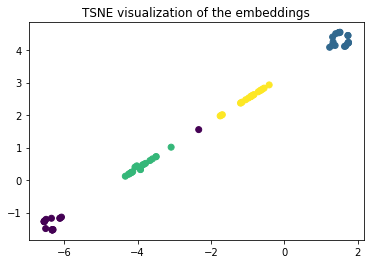

In [3]:
embeddings_drugs, _, _ = dngr_pipeline(dd_net, N_rand_drugs, [60, 40, 20])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
      DropoutNoise-1                  [-1, 100]               0
            Linear-2                   [-1, 60]           6,060
           Sigmoid-3                   [-1, 60]               0
        BasicBlock-4                   [-1, 60]               0
            Linear-5                   [-1, 40]           2,440
           Sigmoid-6                   [-1, 40]               0
        BasicBlock-7                   [-1, 40]               0
            Linear-8                   [-1, 20]             820
           Sigmoid-9                   [-1, 20]               0
       BasicBlock-10                   [-1, 20]               0
           Linear-11                   [-1, 40]             840
          Sigmoid-12                   [-1, 40]               0
       BasicBlock-13                   [-1, 40]               0
           Linear-14                   

../src/dgnr.py:86: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,   100] loss: 0.483
[2,   100] loss: 0.447
[3,   100] loss: 0.446
[4,   100] loss: 0.446
[5,   100] loss: 0.446
[6,   100] loss: 0.446
[7,   100] loss: 0.446
[8,   100] loss: 0.446
[9,   100] loss: 0.446
[10,   100] loss: 0.445
[11,   100] loss: 0.445
[12,   100] loss: 0.444
[13,   100] loss: 0.441
[14,   100] loss: 0.436
[15,   100] loss: 0.430
[16,   100] loss: 0.424
[17,   100] loss: 0.420
[18,   100] loss: 0.418
[19,   100] loss: 0.417
[20,   100] loss: 0.416
[21,   100] loss: 0.416
[22,   100] loss: 0.416
[23,   100] loss: 0.415
[24,   100] loss: 0.414
[25,   100] loss: 0.414
[26,   100] loss: 0.414
[27,   100] loss: 0.413
[28,   100] loss: 0.412
[29,   100] loss: 0.410
[30,   100] loss: 0.408
[31,   100] loss: 0.406
[32,   100] loss: 0.402
[33,   100] loss: 0.399
[34,   100] loss: 0.396
[35,   100] loss: 0.392
[36,   100] loss: 0.389
[37,   100] loss: 0.385
[38,   100] loss: 0.382
[39,   100] loss: 0.378
[40,   100] loss: 0.375
[41,   100] loss: 0.371
[42,   100] loss: 0.368
[

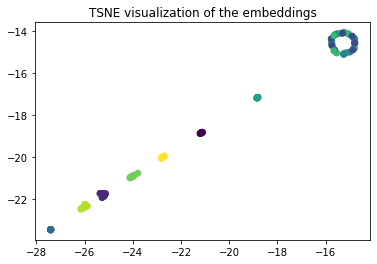

In [4]:
embeddings_targets, _, _ = dngr_pipeline(pp_net, N_rand_targets, [60, 40, 20])

In [8]:
S, H, W, train, test=pu_learning_new(5, embeddings_drugs, embeddings_targets, dp_net, batch_size=1, lr=1e-3, n_epochs=1000, train_size=0.5)
S

Spliting train and test sets...
Building the train loader...
Number of variables: 200
Finding positive and negative examples...
Number of train examples: 4130
Number of positive examples in train set: 2037
Number of negative/unlabelled examples in train set: 2093
[1] loss: 2.236, auc: 0.503, acc: 0.500
[2] loss: 0.845, auc: 0.501, acc: 0.494
[3] loss: 0.642, auc: 0.514, acc: 0.518
[4] loss: 0.582, auc: 0.521, acc: 0.523
[5] loss: 0.552, auc: 0.523, acc: 0.528
[6] loss: 0.544, auc: 0.519, acc: 0.509
[7] loss: 0.541, auc: 0.520, acc: 0.515
[8] loss: 0.530, auc: 0.504, acc: 0.504
[9] loss: 0.531, auc: 0.513, acc: 0.512
[10] loss: 0.522, auc: 0.497, acc: 0.489
[11] loss: 0.518, auc: 0.513, acc: 0.491
[12] loss: 0.511, auc: 0.521, acc: 0.513
[13] loss: 0.511, auc: 0.518, acc: 0.523
[14] loss: 0.510, auc: 0.525, acc: 0.515
[15] loss: 0.509, auc: 0.519, acc: 0.520
[16] loss: 0.506, auc: 0.523, acc: 0.528
[17] loss: 0.503, auc: 0.512, acc: 0.508
[18] loss: 0.510, auc: 0.516, acc: 0.517
[19] lo

[193] loss: 0.485, auc: 0.543, acc: 0.534
[194] loss: 0.487, auc: 0.536, acc: 0.528
[195] loss: 0.487, auc: 0.540, acc: 0.526
[196] loss: 0.487, auc: 0.535, acc: 0.535
[197] loss: 0.485, auc: 0.546, acc: 0.537
[198] loss: 0.484, auc: 0.549, acc: 0.523
[199] loss: 0.489, auc: 0.550, acc: 0.528
[200] loss: 0.480, auc: 0.547, acc: 0.524
[201] loss: 0.485, auc: 0.541, acc: 0.529
[202] loss: 0.479, auc: 0.531, acc: 0.527
[203] loss: 0.490, auc: 0.542, acc: 0.534
[204] loss: 0.481, auc: 0.541, acc: 0.523
[205] loss: 0.483, auc: 0.534, acc: 0.530
[206] loss: 0.485, auc: 0.539, acc: 0.524
[207] loss: 0.485, auc: 0.539, acc: 0.531
[208] loss: 0.484, auc: 0.530, acc: 0.526
[209] loss: 0.485, auc: 0.550, acc: 0.526
[210] loss: 0.485, auc: 0.544, acc: 0.529
[211] loss: 0.485, auc: 0.539, acc: 0.524
[212] loss: 0.486, auc: 0.548, acc: 0.524
[213] loss: 0.486, auc: 0.531, acc: 0.523
[214] loss: 0.490, auc: 0.551, acc: 0.540
[215] loss: 0.486, auc: 0.549, acc: 0.523
[216] loss: 0.483, auc: 0.535, acc

[389] loss: 0.486, auc: 0.548, acc: 0.528
[390] loss: 0.482, auc: 0.540, acc: 0.525
[391] loss: 0.485, auc: 0.548, acc: 0.527
[392] loss: 0.484, auc: 0.545, acc: 0.536
[393] loss: 0.484, auc: 0.548, acc: 0.523
[394] loss: 0.483, auc: 0.550, acc: 0.510
[395] loss: 0.484, auc: 0.547, acc: 0.538
[396] loss: 0.486, auc: 0.548, acc: 0.538
[397] loss: 0.482, auc: 0.549, acc: 0.538
[398] loss: 0.483, auc: 0.550, acc: 0.544
[399] loss: 0.484, auc: 0.538, acc: 0.527
[400] loss: 0.483, auc: 0.556, acc: 0.508
[401] loss: 0.487, auc: 0.542, acc: 0.524
[402] loss: 0.485, auc: 0.543, acc: 0.534
[403] loss: 0.484, auc: 0.546, acc: 0.525
[404] loss: 0.485, auc: 0.533, acc: 0.533
[405] loss: 0.485, auc: 0.542, acc: 0.539
[406] loss: 0.486, auc: 0.539, acc: 0.538
[407] loss: 0.483, auc: 0.536, acc: 0.524
[408] loss: 0.486, auc: 0.543, acc: 0.538
[409] loss: 0.483, auc: 0.545, acc: 0.526
[410] loss: 0.486, auc: 0.550, acc: 0.534
[411] loss: 0.483, auc: 0.540, acc: 0.530
[412] loss: 0.483, auc: 0.544, acc

[585] loss: 0.485, auc: 0.539, acc: 0.533
[586] loss: 0.482, auc: 0.553, acc: 0.529
[587] loss: 0.485, auc: 0.551, acc: 0.536
[588] loss: 0.486, auc: 0.549, acc: 0.529
[589] loss: 0.484, auc: 0.542, acc: 0.535
[590] loss: 0.484, auc: 0.540, acc: 0.533
[591] loss: 0.484, auc: 0.546, acc: 0.525
[592] loss: 0.483, auc: 0.550, acc: 0.531
[593] loss: 0.482, auc: 0.548, acc: 0.531
[594] loss: 0.484, auc: 0.543, acc: 0.533
[595] loss: 0.485, auc: 0.537, acc: 0.529
[596] loss: 0.484, auc: 0.548, acc: 0.525
[597] loss: 0.485, auc: 0.549, acc: 0.536
[598] loss: 0.484, auc: 0.552, acc: 0.526
[599] loss: 0.484, auc: 0.546, acc: 0.537
[600] loss: 0.482, auc: 0.546, acc: 0.526
[601] loss: 0.484, auc: 0.547, acc: 0.538
[602] loss: 0.483, auc: 0.555, acc: 0.511
[603] loss: 0.481, auc: 0.533, acc: 0.527
[604] loss: 0.484, auc: 0.543, acc: 0.525
[605] loss: 0.486, auc: 0.546, acc: 0.530
[606] loss: 0.484, auc: 0.548, acc: 0.530
[607] loss: 0.483, auc: 0.538, acc: 0.536
[608] loss: 0.483, auc: 0.543, acc

[781] loss: 0.484, auc: 0.547, acc: 0.537
[782] loss: 0.484, auc: 0.544, acc: 0.534
[783] loss: 0.484, auc: 0.545, acc: 0.535
[784] loss: 0.482, auc: 0.543, acc: 0.540
[785] loss: 0.483, auc: 0.549, acc: 0.533
[786] loss: 0.485, auc: 0.544, acc: 0.538
[787] loss: 0.483, auc: 0.547, acc: 0.534
[788] loss: 0.482, auc: 0.545, acc: 0.537
[789] loss: 0.482, auc: 0.540, acc: 0.535
[790] loss: 0.483, auc: 0.547, acc: 0.535
[791] loss: 0.483, auc: 0.549, acc: 0.524
[792] loss: 0.483, auc: 0.551, acc: 0.528
[793] loss: 0.482, auc: 0.546, acc: 0.536
[794] loss: 0.483, auc: 0.543, acc: 0.530
[795] loss: 0.484, auc: 0.549, acc: 0.532
[796] loss: 0.480, auc: 0.552, acc: 0.533
[797] loss: 0.483, auc: 0.550, acc: 0.527
[798] loss: 0.482, auc: 0.545, acc: 0.534
[799] loss: 0.484, auc: 0.553, acc: 0.536
[800] loss: 0.484, auc: 0.548, acc: 0.537
[801] loss: 0.482, auc: 0.540, acc: 0.539
[802] loss: 0.482, auc: 0.551, acc: 0.526
[803] loss: 0.485, auc: 0.545, acc: 0.540
[804] loss: 0.483, auc: 0.549, acc

[977] loss: 0.481, auc: 0.555, acc: 0.530
[978] loss: 0.479, auc: 0.551, acc: 0.526
[979] loss: 0.485, auc: 0.555, acc: 0.537
[980] loss: 0.481, auc: 0.546, acc: 0.535
[981] loss: 0.483, auc: 0.551, acc: 0.537
[982] loss: 0.484, auc: 0.552, acc: 0.528
[983] loss: 0.480, auc: 0.550, acc: 0.536
[984] loss: 0.483, auc: 0.559, acc: 0.527
[985] loss: 0.482, auc: 0.546, acc: 0.524
[986] loss: 0.482, auc: 0.545, acc: 0.531
[987] loss: 0.484, auc: 0.528, acc: 0.511
[988] loss: 0.485, auc: 0.552, acc: 0.537
[989] loss: 0.482, auc: 0.541, acc: 0.539
[990] loss: 0.483, auc: 0.549, acc: 0.530
[991] loss: 0.482, auc: 0.550, acc: 0.542
[992] loss: 0.481, auc: 0.555, acc: 0.531
[993] loss: 0.480, auc: 0.546, acc: 0.543
[994] loss: 0.483, auc: 0.543, acc: 0.538
[995] loss: 0.481, auc: 0.548, acc: 0.529
[996] loss: 0.484, auc: 0.548, acc: 0.544
[997] loss: 0.483, auc: 0.549, acc: 0.538
[998] loss: 0.483, auc: 0.551, acc: 0.535
[999] loss: 0.481, auc: 0.549, acc: 0.541
[1000] loss: 0.480, auc: 0.549, ac

tensor([[ 0.1832,  0.7100,  0.1094,  ...,  0.1094,  0.1095,  0.6616],
        [ 0.1327, -0.0273,  0.0700,  ...,  0.0700,  0.0700, -0.0746],
        [ 0.1828,  0.7104,  0.1093,  ...,  0.1093,  0.1093,  0.6616],
        ...,
        [ 0.3086,  0.0274,  0.1566,  ...,  0.1566,  0.1566,  0.1971],
        [ 0.3104,  0.0247,  0.1575,  ...,  0.1575,  0.1575,  0.1946],
        [ 0.1386, -0.0416,  0.0734,  ...,  0.0734,  0.0734, -0.0919]],
       grad_fn=<MmBackward>)

In [6]:
print(embeddings_drugs.shape)

(80, 20)
